In [ ]:
from datetime import datetime
from meteostat import Point, Daily
import pandas as pd
import numpy as np
from skimage import img_as_ubyte
from skimage import color
from pyts.image import GramianAngularField
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm 
import statsmodels.tsa.api as tsa

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Dense, Flatten, Conv2D, MaxPooling2D

from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

In [ ]:
HORIZON: int = 1

In [246]:
# Lectura del archivo CSV
data = pd.read_csv('./data/madrid_clima.csv', index_col='time', parse_dates=True)

# Selección de las columnas deseadas
print(data.shape)

start_date = '2006-01-01'
data = data.loc[start_date:, ['tavg', 'tmin', 'tmax', 'pres', 'prcp']]

print(data.shape)
# Mostrar los valores nulos de cada columna
print(data.isnull().sum())


(30316, 10)
(6209, 4)
tmin      0
tmax      0
prcp      0
pres    747
dtype: int64


In [ ]:
data.describe()

## Inputación

In [247]:
# Imputar los valores nulos en la columna 'tsun' por la media de la columna
data['pres'].fillna(data['pres'].mean(), inplace=True)
# data['wdir'].fillna(data['wdir'].mean(), inplace=True)
# data['wspd'].fillna(data['wspd'].mean(), inplace=True)

# Mostrar los valores nulos después de la imputación
print(data.isnull().sum())


tmin    0
tmax    0
prcp    0
pres    0
dtype: int64


In [248]:
"""
from sklearn.impute import KNNImputer

# Crear un imputador KNN
imputer = KNNImputer(n_neighbors=5)

# Imputar los valores nulos en el DataFrame
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Mostrar los valores nulos después de la imputación
print(data.isnull().sum())
"""


'\nfrom sklearn.impute import KNNImputer\n\n# Crear un imputador KNN\nimputer = KNNImputer(n_neighbors=5)\n\n# Imputar los valores nulos en el DataFrame\ndata = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)\n\n# Mostrar los valores nulos después de la imputación\nprint(data.isnull().sum())\n'

## Composición de la serie temporal

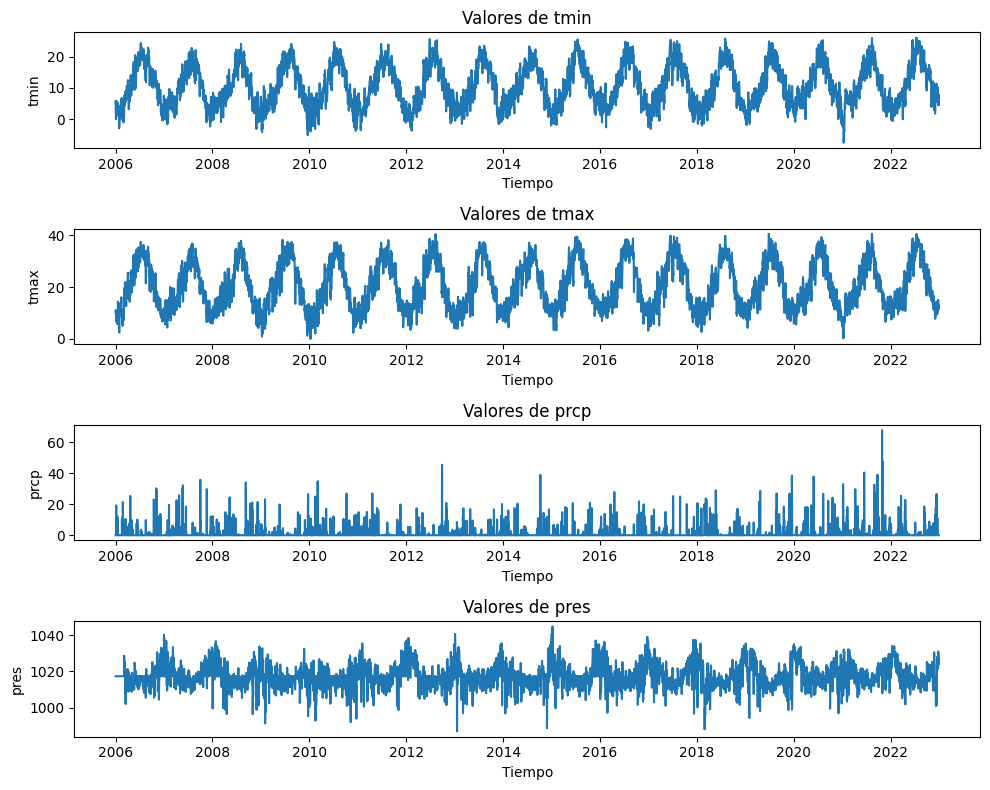

In [249]:
# Configuración de la figura
fig, axes = plt.subplots(nrows=len(data.columns), figsize=(10, 2 * len(data.columns)))

# Gráficas de los valores originales para cada columna
for i, column in enumerate(data.columns):
    # Obtener la serie temporal
    time_series = data[column]

    # Convertir el índice a fechas
    time_series.index = pd.to_datetime(time_series.index)

    # Graficar los valores originales
    axes[i].plot(time_series.index, time_series.values)
    axes[i].set_title(f'Valores de {column}')
    axes[i].set_xlabel('Tiempo')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()


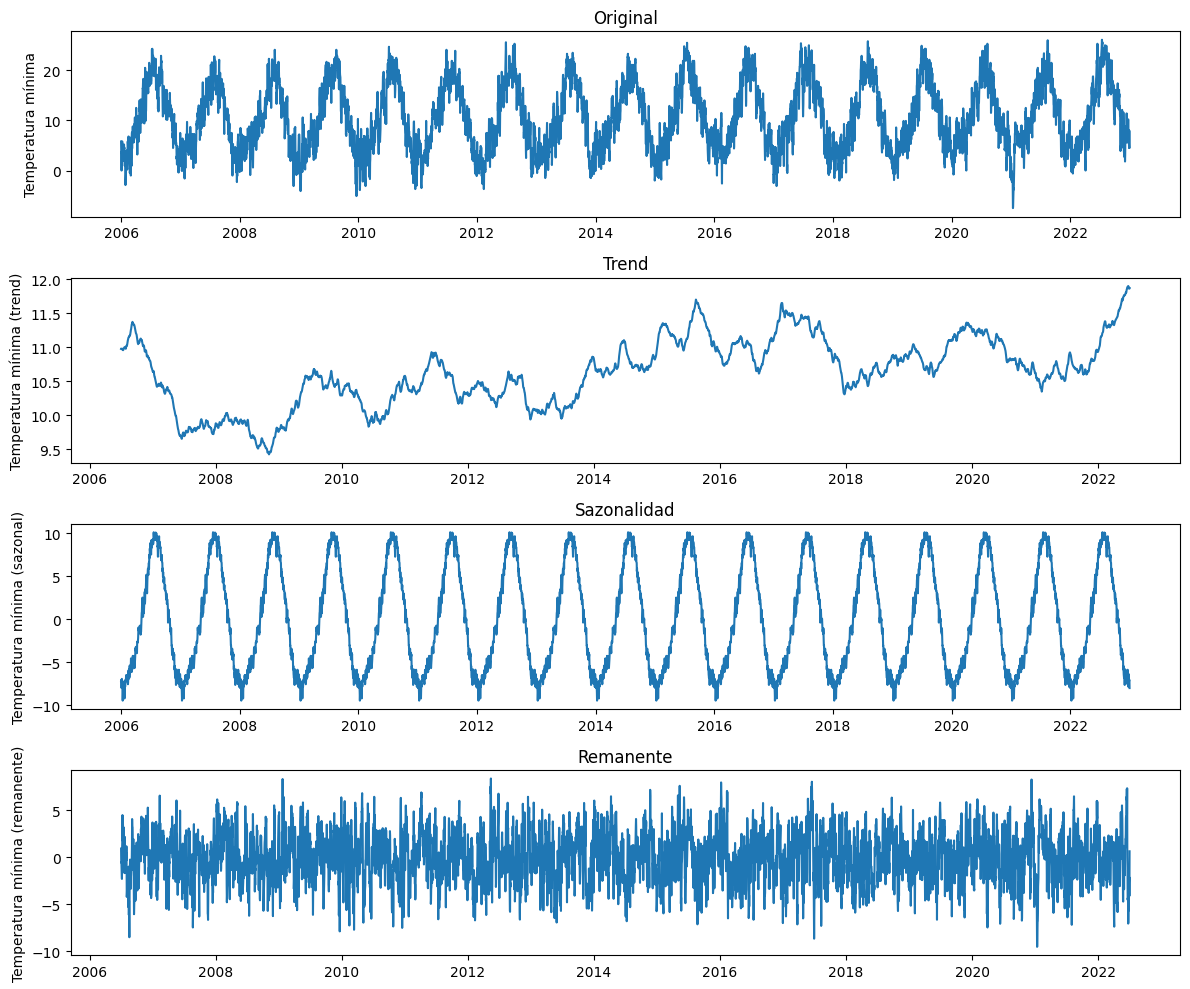

In [250]:
# Decompose the time series
columna = "tmin"
decomposed = seasonal_decompose(data[columna], model='additive', period=365)

# Plot the decomposed time series
fig, axes = plt.subplots(4, 1, figsize=(12, 10))

axes[0].plot(data[columna])
axes[0].set_title('Original')
axes[0].set_ylabel('Temperatura mínima')

axes[1].plot(decomposed.trend)
axes[1].set_title('Trend')
axes[1].set_ylabel('Temperatura mínima (trend)')

axes[2].plot(decomposed.seasonal)
axes[2].set_title('Sazonalidad')
axes[2].set_ylabel('Temperatura mínima (sazonal)')

axes[3].plot(decomposed.resid)
axes[3].set_title('Remanente')
axes[3].set_ylabel('Temperatura mínima (remanente)')

plt.tight_layout()
plt.show()


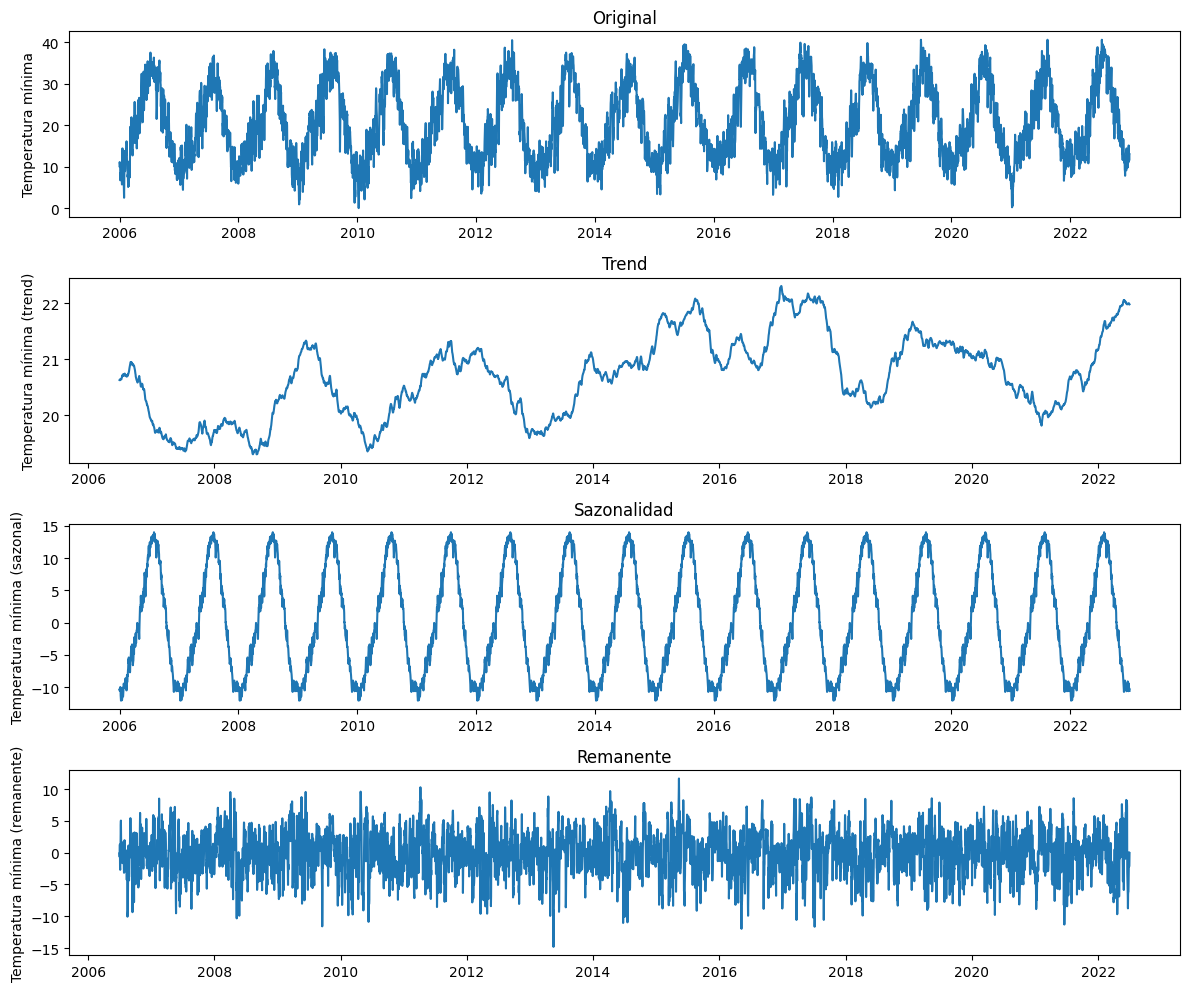

In [251]:
# Decompose the time series
columna = "tmax"
decomposed = seasonal_decompose(data[columna], model='additive', period=365)

# Plot the decomposed time series
fig, axes = plt.subplots(4, 1, figsize=(12, 10))

axes[0].plot(data[columna])
axes[0].set_title('Original')
axes[0].set_ylabel('Temperatura mínima')

axes[1].plot(decomposed.trend)
axes[1].set_title('Trend')
axes[1].set_ylabel('Temperatura mínima (trend)')

axes[2].plot(decomposed.seasonal)
axes[2].set_title('Sazonalidad')
axes[2].set_ylabel('Temperatura mínima (sazonal)')

axes[3].plot(decomposed.resid)
axes[3].set_title('Remanente')
axes[3].set_ylabel('Temperatura mínima (remanente)')

plt.tight_layout()
plt.show()


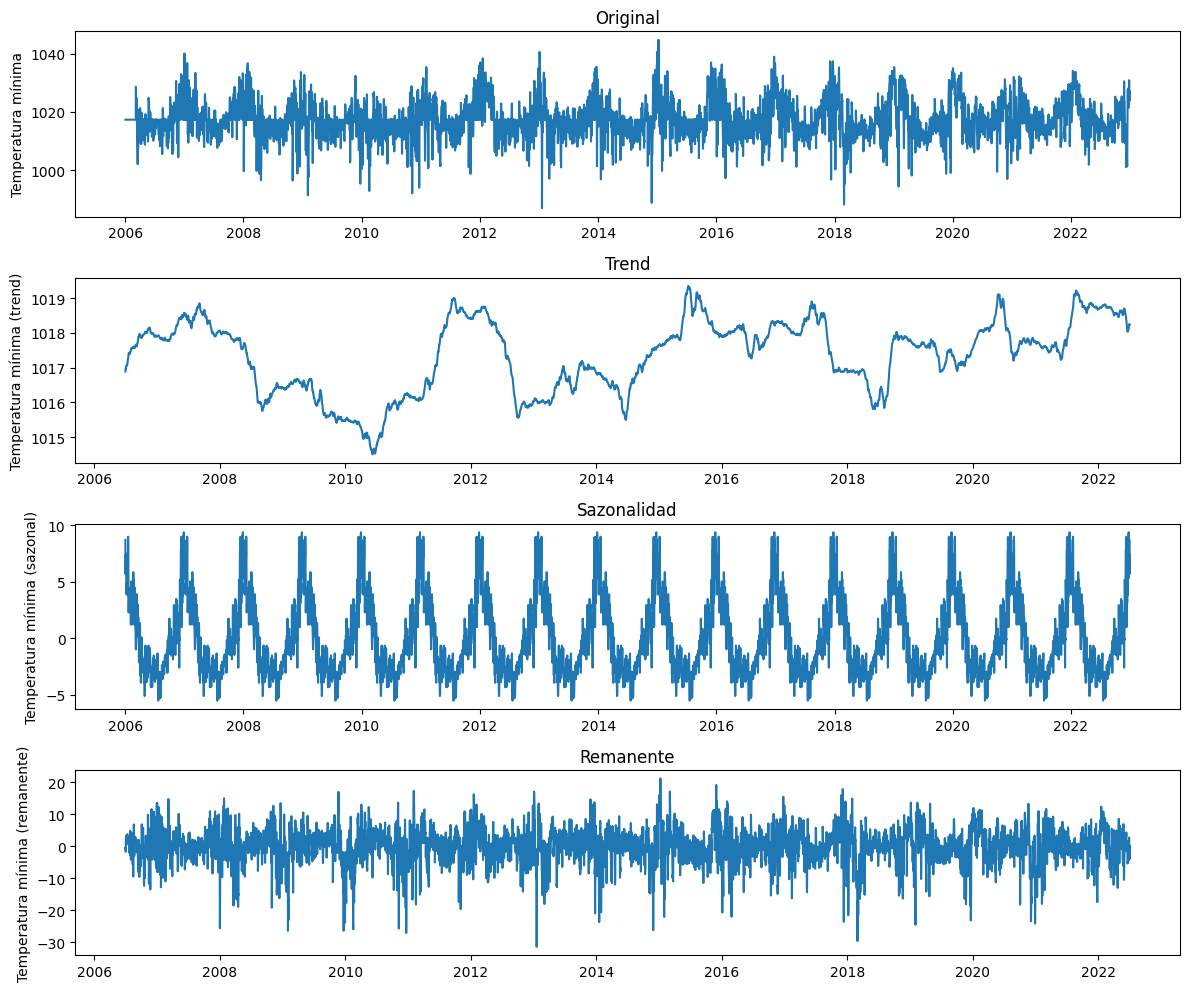

In [252]:
# Decompose the time series
columna = "pres"
decomposed = seasonal_decompose(data[columna], model='additive', period=365)

# Plot the decomposed time series
fig, axes = plt.subplots(4, 1, figsize=(12, 10))

axes[0].plot(data[columna])
axes[0].set_title('Original')
axes[0].set_ylabel('Temperatura mínima')

axes[1].plot(decomposed.trend)
axes[1].set_title('Trend')
axes[1].set_ylabel('Temperatura mínima (trend)')

axes[2].plot(decomposed.seasonal)
axes[2].set_title('Sazonalidad')
axes[2].set_ylabel('Temperatura mínima (sazonal)')

axes[3].plot(decomposed.resid)
axes[3].set_title('Remanente')
axes[3].set_ylabel('Temperatura mínima (remanente)')

plt.tight_layout()
plt.show()

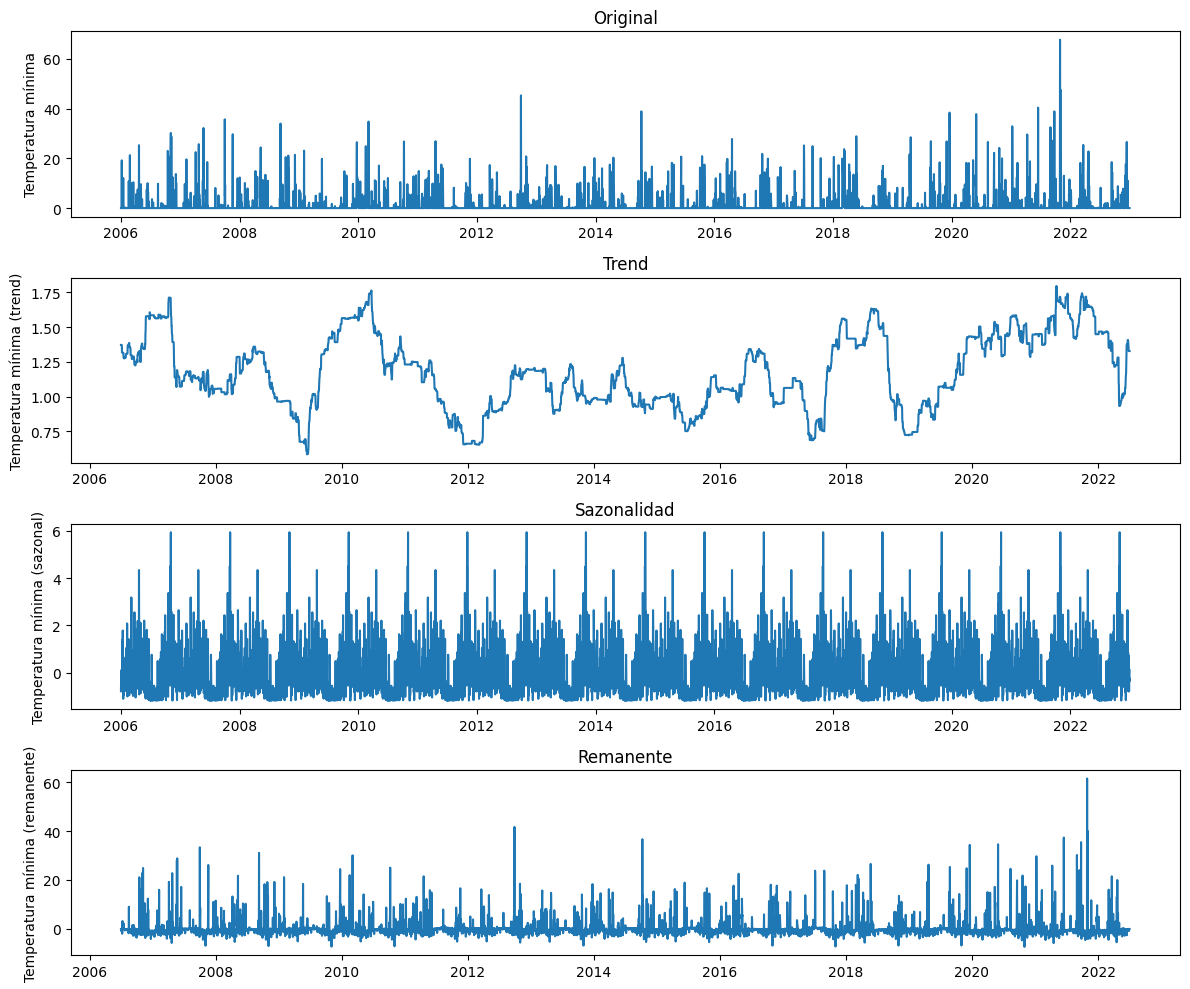

In [253]:
# Decompose the time series
columna = "prcp"
decomposed = seasonal_decompose(data[columna], model='additive', period=365)

# Plot the decomposed time series
fig, axes = plt.subplots(4, 1, figsize=(12, 10))

axes[0].plot(data[columna])
axes[0].set_title('Original')
axes[0].set_ylabel('Temperatura mínima')

axes[1].plot(decomposed.trend)
axes[1].set_title('Trend')
axes[1].set_ylabel('Temperatura mínima (trend)')

axes[2].plot(decomposed.seasonal)
axes[2].set_title('Sazonalidad')
axes[2].set_ylabel('Temperatura mínima (sazonal)')

axes[3].plot(decomposed.resid)
axes[3].set_title('Remanente')
axes[3].set_ylabel('Temperatura mínima (remanente)')

plt.tight_layout()
plt.show()


## Predición con CNN

In [254]:
window_size = 48
y = (data['prcp'].shift(-window_size) >= 0.1).astype(int)[window_size:] 

# Inicializar el escalador MinMax
scaler = MinMaxScaler(feature_range=(-1, 1))

# Normalizar el DataFrame
df_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [255]:
# Assuming you have a DataFrame named 'df' with columns 'tmin', 'tmax', 'prcp', and an index 'time'
# If not, you can create it using df = pd.DataFrame(data, columns=['tmin', 'tmax', 'prcp'], index=time)


windows = []

gasf_sum = GramianAngularField(method='summation')
gadf_dif = GramianAngularField(method='difference')

for i in range(len(data) - window_size + 1):
    window = data.iloc[i:i + window_size]
    chanels = []
    for key in window:
        # print(window[key].values)
        # print(gasf_sum.fit_transform([window[key].values]))
        chanels.append(gasf_sum.fit_transform([window[key].values])[0])
        chanels.append(gadf_dif.fit_transform([window[key].values])[0])
        
    channels_transposed = np.transpose(chanels, (1, 2, 0))
    windows.append(channels_transposed)

# Prepare the data for model training
X = np.array(windows[:-1])  # Input data (excluding the last window)
# y = (data['prcp'].shift(-window_size) >= 0.1).astype(int)[window_size:]  # Target variable


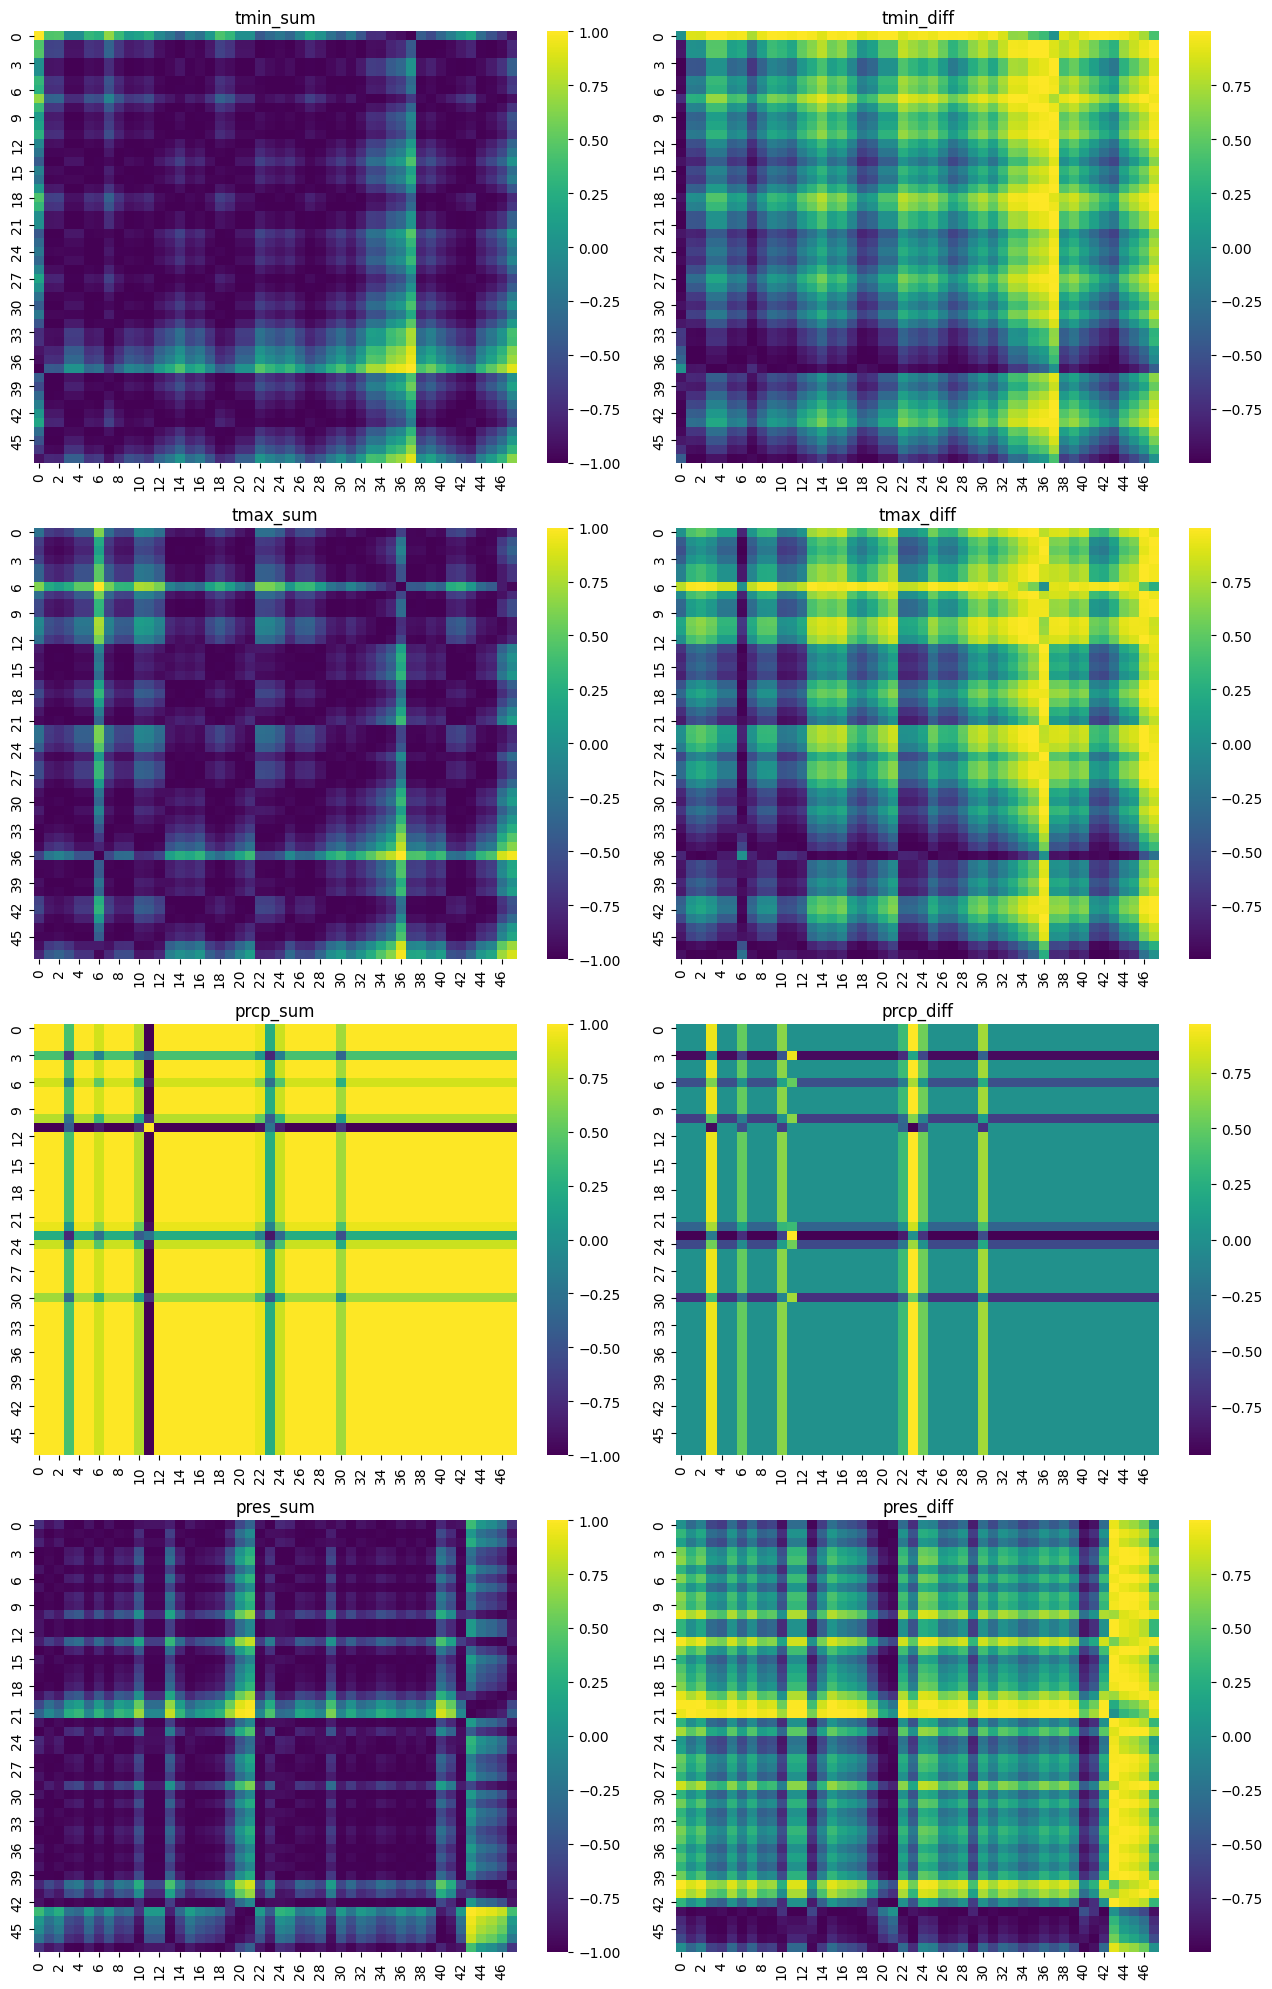

In [257]:
# Obtén las bandas de la primera ventana
first_window_channels = windows[100]

# Configuración de los gráficos
fig, axes = plt.subplots(nrows=len(data.columns), ncols=2, figsize=(13, len(data.columns)*5))

# Itera sobre las bandas y grafica cada una
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(first_window_channels[:, :, i], ax=ax, cmap='viridis', cbar=True)
    
    title = data.columns[i//2] + "_" + "sum" if i%2 == 0 else data.columns[i//2] + "_" + "diff" 
    ax.set_title(title)

plt.tight_layout()
plt.show()


In [258]:
print(X.shape, y.shape)

(6161, 48, 48, 8) (6161,)


In [259]:
TRAIN_SAMPLE = 0.8

split_index = int(TRAIN_SAMPLE * len(X))
X_train, X_test, y_train, y_test = X[:split_index], X[split_index:], y[:split_index], y[split_index:]

In [260]:
# Assuming 'target' is a binary classification target variable (0 or 1)
# Find indices of each class
indices_class_0 = np.where(y_train == 0)[0]
indices_class_1 = np.where(y_train == 1)[0]

# Calculate the minimum number of samples in any class
min_samples = min(len(indices_class_0), len(indices_class_1))

# Undersample each class to have the minimum number of samples
undersampled_indices_class_0 = resample(indices_class_0, n_samples=min_samples, replace=False, random_state=42)
undersampled_indices_class_1 = resample(indices_class_1, n_samples=min_samples, replace=False, random_state=42)

# Concatenate undersampled indices
undersampled_indices = np.concatenate([undersampled_indices_class_0, undersampled_indices_class_1])

total_sample = int(undersampled_indices.shape[0] * TRAIN_SAMPLE)

# Shuffle the undersampled indices
np.random.shuffle(undersampled_indices)

# Use undersampled indices to create new datasets
X_train, y_train = X[undersampled_indices, :, :], y[undersampled_indices]


In [261]:
# split_index = int(0.8 * len(X))
# X_train, X_test, y_train, y_test = X[:split_index], X[split_index:], y[:split_index], y[split_index:]

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer with binary activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall']) # metrics=['accuracy']

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)


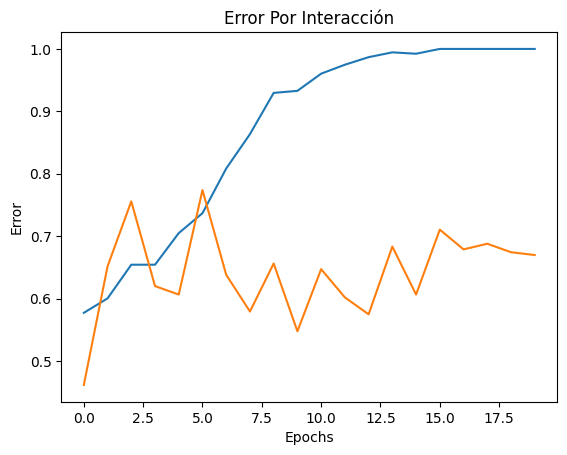

In [262]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title("Error Por Interacción")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [263]:
# Evaluate the model on the test set
acuracy = model.evaluate(X_test, y_test, verbose=0)[1]
# print(recall)
print(f"Acuracy on the test set: {acuracy * 100:.2f}%")
# 67.32%

Acuracy on the test set: 44.69%


39/39 [==============================] - 7s 44ms/step


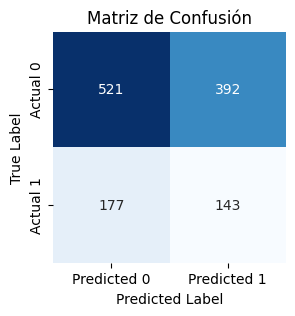

              precision    recall  f1-score   support

           0       0.75      0.57      0.65       913
           1       0.27      0.45      0.33       320

    accuracy                           0.54      1233
   macro avg       0.51      0.51      0.49      1233
weighted avg       0.62      0.54      0.57      1233



In [264]:
# Suponiendo que ya tienes las predicciones y las etiquetas reales
predictions = model.predict(X_test)
threshold = 0.5
predicted_labels = (predictions > threshold).astype(int)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Crear un DataFrame con la matriz de confusión
confusion_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Crear un mapa de calor utilizando seaborn
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión')
plt.show()
# 784 129
# 274 46

# 741 172
# 247 73
print(classification_report(y_test, predicted_labels))

## LSTM

In [ ]:
# Objetivo Predecir si llueve o no
data['rains'] = (data['prcp'] > 0.1)
data = data.dropna(how = 'any', subset = 'rains').drop(columns = 'prcp', errors = 'ignore')
data['rains'] = data['rains'].astype(int)
data.head()

In [ ]:
WINDOW_SIZE = 7

EPOCHS = 20
BATCH_SIZE = 32

feature_cols = ['tmin', 'tavg', 'tmax', 'pres']
target_col   = 'rains'

In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    target = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i+sequence_length][feature_cols].values
        label = data.iloc[i+sequence_length][target_col]
        sequences.append(seq)
        target.append(label)
    return np.array(sequences), np.array(target)


In [ ]:
def build_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
sequences, target = create_sequences(data, WINDOW_SIZE)

In [ ]:
TRAIN_SAMPLE = 0.8
VAL_SAMPLE   = 0.1
total_sample = int(sequences.shape[0] * TRAIN_SAMPLE)
x_train, y_train = sequences[:total_sample, :, :], target[:total_sample]

# start_sample = total_sample
# total_sample = int(sequences.shape[0] * (TRAIN_SAMPLE + VAL_SAMPLE))
# 
# x_val  , y_val   = sequences[start_sample:total_sample, :, :], target[start_sample:total_sample]
x_test , y_test  = sequences[total_sample:, :, :], target[total_sample:]

undersampler = RandomUnderSampler(random_state=42)
x_train, y_train = undersampler.fit_resample(x_train.reshape((-1,WINDOW_SIZE*len(feature_cols))), y_train)
x_train = x_train.reshape((-1, WINDOW_SIZE, len(feature_cols)))
print(x_train.shape, y_train.shape)

scaler  = StandardScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, len(feature_cols))).reshape((-1, WINDOW_SIZE, len(feature_cols)))
# x_val   = scaler.transform(x_val.reshape(-1, len(feature_cols))).reshape((-1, WINDOW_SIZE, len(feature_cols)))
x_test  = scaler.transform(x_test.reshape(-1, len(feature_cols))).reshape((-1, WINDOW_SIZE, len(feature_cols)))


In [ ]:
model = build_model(input_shape=(WINDOW_SIZE, len(feature_cols)))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(
    x_train, y_train, 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE, 
    # validation_data=(x_val, y_val), 
    validation_split = 0.1,
    verbose = 0
)


In [ ]:
plt.plot(history.history['accuracy'], label = "train")
plt.plot(history.history['val_accuracy'], label = "val")
plt.title("Error Por Interacción")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()

In [ ]:
# Suponiendo que ya tienes las predicciones y las etiquetas reales
predictions = model.predict(x_test)
threshold = 0.5
predicted_labels = (predictions > threshold).astype(int)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predicted_labels)
print(classification_report(y_test, predicted_labels))

# Crear un DataFrame con la matriz de confusión
confusion_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Crear un mapa de calor utilizando seaborn
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión')
plt.show()
